<a href="https://colab.research.google.com/github/Vaishnavisharan/Machine_Learning-Project/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score

LOADING THE DATASET

In [2]:
train=pd.read_csv('house_train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [11]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [13]:
train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [14]:
train['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [15]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [17]:
train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87d7d8be90>]],
      dtype=object)

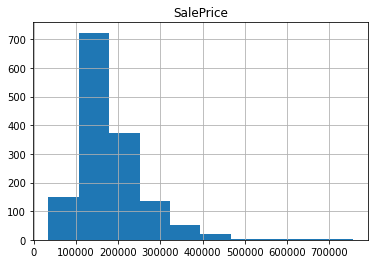

In [18]:
train.hist(['SalePrice'])

In [19]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

FILLING THE NULL VALUES 

In [20]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [21]:
train['Alley'] = train['Alley'].fillna(train['Alley'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['PoolQC'] = train['PoolQC'].fillna(train['PoolQC'].mode()[0])
train['Fence'] = train['Fence'].fillna(train['Fence'].mode()[0])
train['MiscFeature'] = train['MiscFeature'].fillna(train['MiscFeature'].mode()[0])

In [22]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

DATA PREPROCESSING 

In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['MSZoning']=le.fit_transform(train['MSZoning'])
train['Street']=le.fit_transform(train['Street'])
train['LotShape']=le.fit_transform(train['LotShape'])
train['LandContour']=le.fit_transform(train['LandContour'])
train['Utilities']=le.fit_transform(train['Utilities'])
train['LotConfig']=le.fit_transform(train['LotConfig'])
train['LandSlope']=le.fit_transform(train['LandSlope'])
train['Neighborhood']=le.fit_transform(train['Neighborhood'])
train['Condition1']=le.fit_transform(train['Condition1'])
train['Condition2']=le.fit_transform(train['Condition2'])
train['BldgType']=le.fit_transform(train['BldgType'])
train['HouseStyle']=le.fit_transform(train['HouseStyle'])
train['RoofStyle']=le.fit_transform(train['RoofStyle'])
train['RoofMatl']=le.fit_transform(train['RoofMatl'])
train['Exterior1st']=le.fit_transform(train['Exterior1st'])
train['Exterior2nd']=le.fit_transform(train['Exterior2nd'])
train['ExterQual']=le.fit_transform(train['ExterQual'])
train['ExterCond']=le.fit_transform(train['ExterCond'])
train['Foundation']=le.fit_transform(train['Foundation'])
train['BsmtQual']=le.fit_transform(train['BsmtQual'])
train['BsmtCond']=le.fit_transform(train['BsmtCond'])
train['BsmtExposure']=le.fit_transform(train['BsmtExposure'])
train['BsmtFinType1']=le.fit_transform(train['BsmtFinType1'])
train['BsmtFinType2']=le.fit_transform(train['BsmtFinType2'])
train['Heating']=le.fit_transform(train['Heating'])
train['CentralAir']=le.fit_transform(train['CentralAir'])
train['Electrical']=le.fit_transform(train['Electrical'])
train['KitchenQual']=le.fit_transform(train['KitchenQual'])
train['Functional']=le.fit_transform(train['Functional'])
train['FireplaceQu']=le.fit_transform(train['FireplaceQu'])
train['GarageType']=le.fit_transform(train['GarageType'])
train['GarageFinish']=le.fit_transform(train['GarageFinish'])
train['GarageQual']=le.fit_transform(train['GarageQual'])
train['GarageCond']=le.fit_transform(train['GarageCond'])
train['PavedDrive']=le.fit_transform(train['PavedDrive'])
train['PoolQC']=le.fit_transform(train['PoolQC'])
train['Fence']=le.fit_transform(train['Fence'])
train['MiscFeature']=le.fit_transform(train['MiscFeature'])
train['SaleType']=le.fit_transform(train['SaleType'])
train['SaleCondition']=le.fit_transform(train['SaleCondition'])
train['Alley']=le.fit_transform(train['Alley'])
train['MasVnrType']=le.fit_transform(train['MasVnrType'])
train['HeatingQC']=le.fit_transform(train['HeatingQC'])

ASSINING X AND Y VALUES 

In [24]:
x=train.drop(['SalePrice'],axis=1)
y=train['SalePrice']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=6)

STANDARDISE THE DATASET 

In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(x_train)
scaled_train=scalar.transform(x_train)

In [27]:
scaled_train

array([[-0.68265973,  0.07072394, -0.04139444, ...,  0.88614927,
        -1.71215476,  0.21205317],
       [ 1.0624311 , -0.88189375, -0.04139444, ...,  1.63959733,
         0.30299553,  0.21205317],
       [ 0.51097285, -0.64373933, -0.04139444, ..., -1.37419488,
         0.30299553,  0.21205317],
       ...,
       [-1.17921088,  2.45226817,  1.52546191, ...,  0.13270122,
         0.30299553,  0.21205317],
       [-0.01900001,  3.16673144, -0.04139444, ..., -1.37419488,
         0.30299553,  0.21205317],
       [ 0.44174216, -0.88189375, -0.04139444, ..., -0.62074683,
         0.30299553,  0.21205317]])

LOADINING TEST DATASET 


In [28]:
test=pd.read_csv('house_test.csv')

In [29]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
test.shape

(1459, 80)

In [31]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [33]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [34]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

FILLING THE NULL VALUES 

In [35]:
test['Alley'] = test['Alley'].fillna(test['Alley'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['PoolQC'] = test['PoolQC'].fillna(test['PoolQC'].mode()[0])
test['Fence'] = test['Fence'].fillna(test['Fence'].mode()[0])
test['MiscFeature'] = test['MiscFeature'].fillna(test['MiscFeature'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [36]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())                                       

DATA PREPROCESSING

In [37]:
test['MSZoning']=le.fit_transform(test['MSZoning'])
test['Street']=le.fit_transform(test['Street'])
test['LotShape']=le.fit_transform(test['LotShape'])
test['LandContour']=le.fit_transform(test['LandContour'])
test['Utilities']=le.fit_transform(test['Utilities'])
test['LotConfig']=le.fit_transform(test['LotConfig'])
test['LandSlope']=le.fit_transform(test['LandSlope'])
test['Neighborhood']=le.fit_transform(test['Neighborhood'])
test['Condition1']=le.fit_transform(test['Condition1'])
test['Condition2']=le.fit_transform(test['Condition2'])
test['BldgType']=le.fit_transform(test['BldgType'])
test['HouseStyle']=le.fit_transform(test['HouseStyle'])
test['RoofStyle']=le.fit_transform(test['RoofStyle'])
test['RoofMatl']=le.fit_transform(test['RoofMatl'])
test['Exterior1st']=le.fit_transform(test['Exterior1st'])
test['Exterior2nd']=le.fit_transform(test['Exterior2nd'])
test['ExterQual']=le.fit_transform(test['ExterQual'])
test['ExterCond']=le.fit_transform(test['ExterCond'])
test['Foundation']=le.fit_transform(test['Foundation'])
test['BsmtQual']=le.fit_transform(test['BsmtQual'])
test['BsmtCond']=le.fit_transform(test['BsmtCond'])
test['BsmtExposure']=le.fit_transform(test['BsmtExposure'])
test['BsmtFinType1']=le.fit_transform(test['BsmtFinType1'])
test['BsmtFinType2']=le.fit_transform(test['BsmtFinType2'])
test['Heating']=le.fit_transform(test['Heating'])
test['CentralAir']=le.fit_transform(test['CentralAir'])
test['Electrical']=le.fit_transform(test['Electrical'])
test['KitchenQual']=le.fit_transform(test['KitchenQual'])
test['Functional']=le.fit_transform(test['Functional'])
test['FireplaceQu']=le.fit_transform(test['FireplaceQu'])
test['GarageType']=le.fit_transform(test['GarageType'])
test['GarageFinish']=le.fit_transform(test['GarageFinish'])
test['GarageQual']=le.fit_transform(test['GarageQual'])
test['GarageCond']=le.fit_transform(test['GarageCond'])
test['PavedDrive']=le.fit_transform(test['PavedDrive'])
test['PoolQC']=le.fit_transform(test['PoolQC'])
test['Fence']=le.fit_transform(test['Fence'])
test['MiscFeature']=le.fit_transform(test['MiscFeature'])
test['SaleType']=le.fit_transform(test['SaleType'])
test['SaleCondition']=le.fit_transform(test['SaleCondition'])
test['Alley']=le.fit_transform(test['Alley'])
test['MasVnrType']=le.fit_transform(test['MasVnrType'])
test['HeatingQC']=le.fit_transform(test['HeatingQC'])

FEATURE IMPORTANCE GRAPH 

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

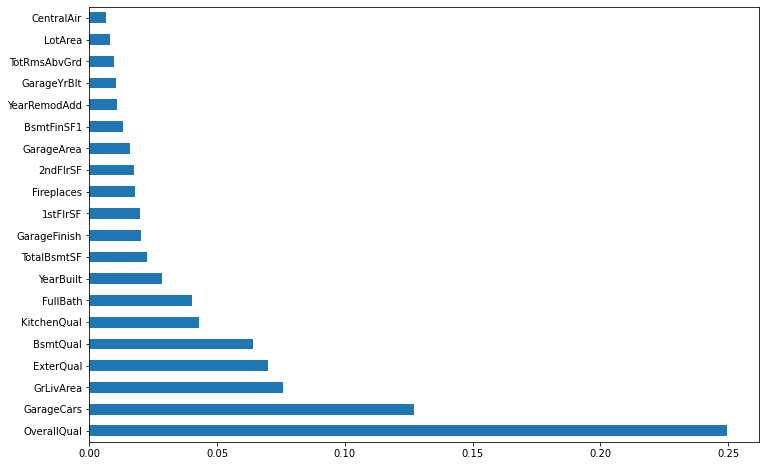

In [39]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

STANDARDISE THE TEST DATASET

In [40]:
scalar = StandardScaler().fit(x_test)

XGBOOSTE REGRESSOR 

In [41]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

[13:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

 XGBOOST TRAINING DATA PREDICTION

In [42]:
training_data_prediction=xgb.predict(x_train)

In [43]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2score
from sklearn.metrics import mean_absolute_error as mae

TRAINING DATA SCORE

In [44]:
score1=r2score(y_train,training_data_prediction)
score2=mse(y_train,training_data_prediction)
score3=mae(y_train,training_data_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.9656798719284343
mse_score : 208124722.04261932
mae_score : 10359.700552684686


TRAINING DATA GRAPH 

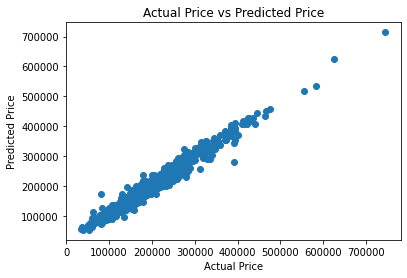

In [45]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [46]:
y_train

435     212000
1166    245350
935      79900
588     143000
80      193500
         ...  
1389    131000
618     314813
227     106000
713     129000
906     255000
Name: SalePrice, Length: 1022, dtype: int64

XGBOOST TESTING DATA PREDICTION 

In [47]:
testing_data_prediction=xgb.predict(x_test)

In [48]:
testing_data_prediction

array([144170.16 , 130122.82 , 166888.19 , 145197.27 , 275290.44 ,
       220554.62 , 128325.164, 184800.8  , 165835.5  , 187948.88 ,
       139587.89 , 151174.8  , 180375.81 , 131473.95 , 338019.   ,
       138897.6  , 174352.34 , 382406.38 , 174312.1  , 240163.72 ,
       132473.8  , 122577.23 , 487208.25 , 167545.92 ,  80488.76 ,
       223592.47 , 141227.03 , 136013.53 , 268516.38 , 165746.6  ,
       143302.77 ,  84327.625, 144960.4  , 200913.12 , 171582.11 ,
       103538.59 , 112145.5  , 154457.88 , 133542.48 , 484037.34 ,
       126255.64 , 133370.45 , 190588.61 , 195727.14 , 124320.234,
       193735.19 , 338920.22 , 208449.72 , 126215.86 , 253582.55 ,
       256186.23 , 106245.06 , 260515.5  , 649339.25 , 115098.15 ,
       146251.12 , 249778.75 , 170089.92 , 116178.56 , 154875.1  ,
       181801.39 , 186171.14 , 194587.72 , 277773.8  , 147994.81 ,
       209275.61 , 203384.67 ,  78965.75 ,  98318.77 , 131691.61 ,
       130740.34 , 295376.97 , 199005.61 , 119568.83 , 224557.

TESTING DATA SCORE 

In [49]:
score1=r2score(y_test,testing_data_prediction)
score2=mse(y_test,testing_data_prediction)
score3=mae(y_test,testing_data_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.8545730754865372
mse_score : 999488381.3656913
mae_score : 16930.82254209475


In [50]:
y_test

613     147000
1352    134900
767     160000
40      160000
983     255900
         ...  
1104    106000
961     272000
402     108000
1266    122000
35      309000
Name: SalePrice, Length: 438, dtype: int64

TESTING DATA GRAPH 

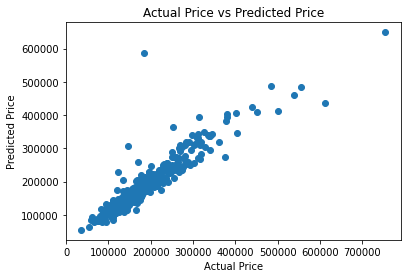

In [51]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

LINEAR REGRESSION 

In [52]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LINEAR MODEL TRAINING DATA PREDICTION 

In [54]:
training_prediction=lr.predict(x_train)

In [55]:
training_prediction

array([237297.86214331, 255005.22461472, 109344.68137941, ...,
        93034.17084149, 116355.11226622, 252035.3064086 ])

TRAINING DATA SCORES

In [56]:
score1=r2score(y_train,training_prediction)
score2=mse(y_train,training_prediction)
score3=mae(y_train,training_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.8644865748345136
mse_score : 821782887.4880278
mae_score : 18823.095019684508


TRAINING DATA GRAPH

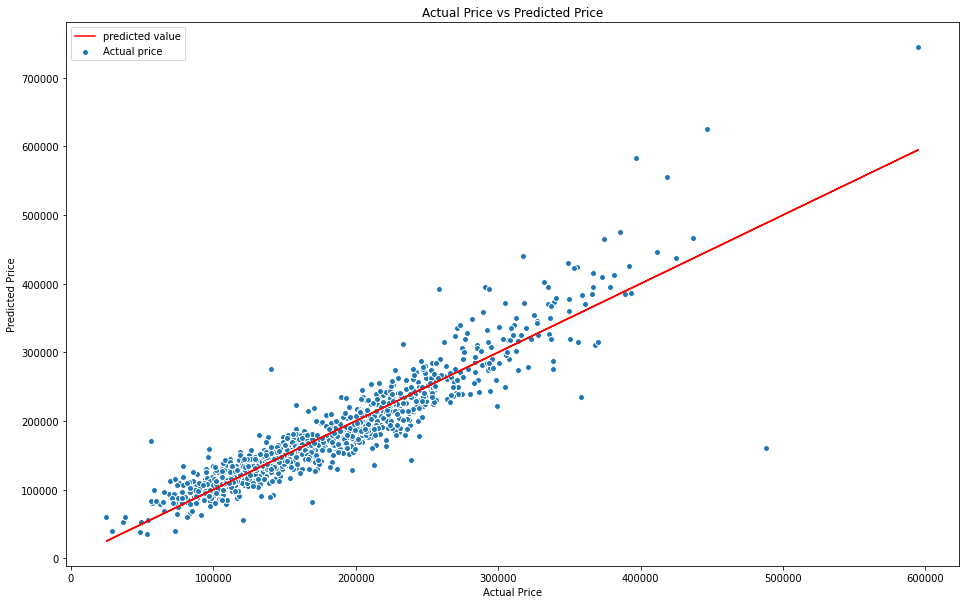

In [57]:
plt.figure(1,figsize=(16,10))
plt.scatter(training_prediction,y_train,edgecolors='w',label='Actual price')
plt.plot(training_prediction,lr.predict(x_train),color='r',label='predicted value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

LINEAR MODEL TEST DATA PREDICTION

In [58]:
testing_prediction=lr.predict(x_test)

In [59]:
testing_prediction

array([126320.07021724, 153833.3968514 , 169929.80815065, 133584.22921814,
       251212.02933705, 222185.37272535, 123618.66957049, 203989.1160719 ,
       181256.7863375 , 204034.49328572, 161942.70881886, 197426.77286752,
       190018.8431174 , 122562.89776028, 358433.82697638, 157967.88811865,
       205835.50474333, 328408.91648116, 165999.05437034, 264559.06552319,
       104514.2213696 ,  93949.65843211, 412913.75529782, 165887.0213781 ,
        61500.25104897, 194473.17107237, 130048.57871892, 137968.01584177,
       280077.43275522, 176947.98276574, 142673.83862476,  99624.44439814,
       139969.12916275, 197507.92322992, 169720.94510064, 112707.65538699,
       114872.98226811, 162709.36099517, 128012.10279614, 397850.53256652,
       131400.99937797, 142448.88340496, 188480.44073183, 194654.94975609,
       128717.66431042, 217312.44270677, 301179.3960152 , 219756.23757811,
       122952.67822985, 290521.16867743, 296172.40242183, 171577.67398828,
       180740.24105725, 5

TESTING DATA SCORES

In [60]:
score1=r2score(y_test,testing_prediction)
score2=mse(y_test,testing_prediction)
score3=mae(y_test,testing_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.8238791368327265
mse_score : 1210441306.1110327
mae_score : 20392.33173746593


TESTING DATA GRAPH 

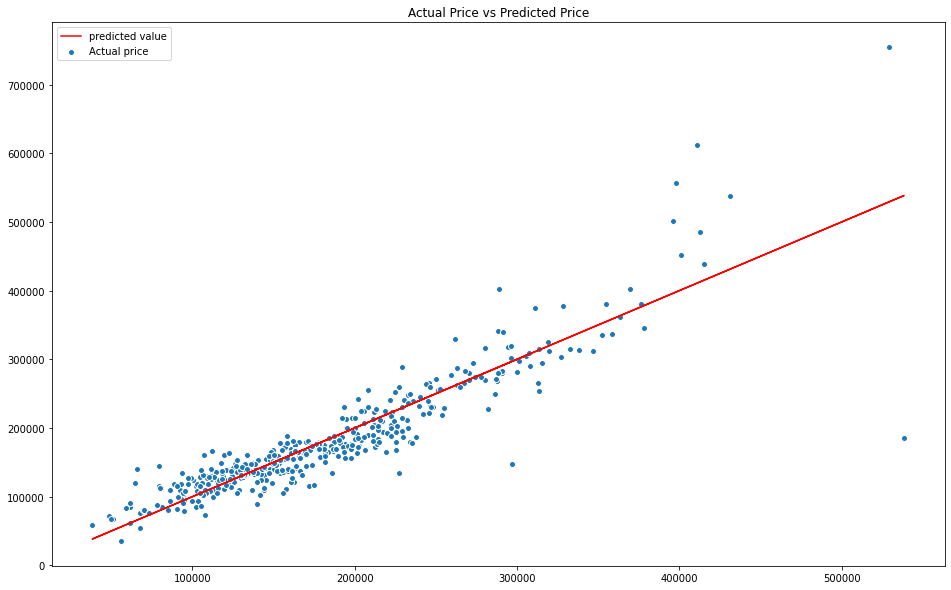

In [61]:
plt.figure(1,figsize=(16,10))
plt.scatter(testing_prediction,y_test,edgecolors='w',label='Actual price')
plt.plot(testing_prediction,lr.predict(x_test),color='r',label='predicted value')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()